In [ ]:
import numpy as np
import cv2
import json
from matplotlib import pyplot as plt

#Erosion usando OpenCV

In [ ]:
img = (cv2.imread('/content/circles.png')[...,0]>0)*255 #Lectura de la imagen
img = img.astype(np.uint8)

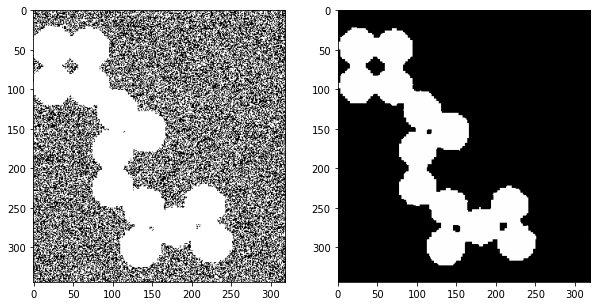

In [ ]:
img_noise = img + np.random.randint(2, size = (img.shape[0], img.shape[1]), dtype = np.uint8)*255 # Imagen + ruido
kernel = np.ones((5,5),np.uint8) 

img_noise_removed = cv2.erode(img_noise,kernel)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img_noise,cmap='gray')

plt.subplot(1,2,2)
plt.imshow(img_noise_removed,cmap='gray')

#Dilatacion con openCV

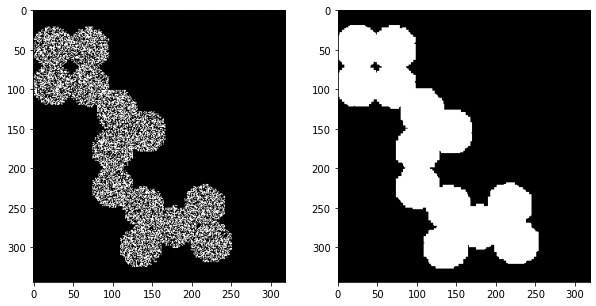

In [ ]:
img_noise_dil = img - np.random.randint(2, size = (img.shape[0], img.shape[1]), dtype = np.uint8)*255 #imagen - ruido
kernel = np.ones((5,5),np.uint8) 

img_noise_removed = cv2.dilate(img_noise_dil,kernel)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img_noise_dil,cmap='gray')

plt.subplot(1,2,2)
plt.imshow(img_noise_removed,cmap='gray')

In [ ]:
class FiltrosMorfologicos():
  """
  erosion

  dilatacion

  apertura

  cierre
  """
  def __init__(self):
    pass

    
  def convert_binary(self, image_src, thresh_val):
    color_1 = 255
    color_2 = 0
    initial_conv = np.where((image_src <= thresh_val), image_src, color_1)
    final_conv = np.where((initial_conv > thresh_val), initial_conv, color_2)
    return final_conv

  def binarize_this(self, image_file, thresh_val=127):
    image_src = image_file
    image_b = self.convert_binary(image_src=image_src, thresh_val=thresh_val)
    return image_b

  #Erosion
  def erode_this( self,image_file, erosion_level=3, with_plot=False):
    erosion_level = 3 if erosion_level < 3 else erosion_level

    

    structuring_kernel = np.full(shape=(erosion_level, erosion_level), fill_value=255)
    image_src = self.binarize_this(image_file=image_file)

    orig_shape = image_src.shape
    pad_width = erosion_level - 2

    # pad the matrix with `pad_width`
    image_pad = np.pad(array=image_src, pad_width=pad_width, mode='constant')
    pimg_shape = image_pad.shape
    h_reduce, w_reduce = (pimg_shape[0] - orig_shape[0]), (pimg_shape[1] - orig_shape[1])

    # sub matrices of kernel size
    flat_submatrices = np.array([
        image_pad[i:(i + erosion_level), j:(j + erosion_level)]
        for i in range(pimg_shape[0] - h_reduce) for j in range(pimg_shape[1] - w_reduce)
    ])

    # condition to replace the values - if the kernel equal to submatrix then 255 else 0
    image_erode = np.array([255 if (i == structuring_kernel).all() else 0 for i in flat_submatrices])
    image_erode = image_erode.reshape(orig_shape)

    if with_plot:
        cmap_val = 'gray'
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 20))

        ax1.axis("off")
        ax1.title.set_text('Original')

        ax2.axis("off")
        ax2.title.set_text("Eroded - {}".format(erosion_level))

        ax1.imshow(image_src, cmap=cmap_val)
        ax2.imshow(image_erode, cmap=cmap_val)
        plt.show()
        return True
    return image_erode

  #dilatacion

  def dilate_this(self, image_file, dilation_level=3, with_plot=False):
      # setting the dilation_level
      dilation_level = 3 if dilation_level < 3 else dilation_level
      
      # obtain the kernel by the shape of (dilation_level, dilation_level)
      structuring_kernel = np.full(shape=(dilation_level, dilation_level), fill_value=255)
      image_src = self.binarize_this(image_file=image_file)
      
      orig_shape = image_src.shape
      pad_width = dilation_level - 2
      
      # pad the image with pad_width
      image_pad = np.pad(array=image_src, pad_width=pad_width, mode='constant')
      pimg_shape = image_pad.shape
      h_reduce, w_reduce = (pimg_shape[0] - orig_shape[0]), (pimg_shape[1] - orig_shape[1])
      
      # obtain the submatrices according to the size of the kernel
      flat_submatrices = np.array([
          image_pad[i:(i + dilation_level), j:(j + dilation_level)]
          for i in range(pimg_shape[0] - h_reduce) for j in range(pimg_shape[1] - w_reduce)
      ])
      
      # replace the values either 255 or 0 by dilation condition
      image_dilate = np.array([255 if (i == structuring_kernel).any() else 0 for i in flat_submatrices])
      # obtain new matrix whose shape is equal to the original image size
      image_dilate = image_dilate.reshape(orig_shape)
      
      # plotting
      if with_plot:
          cmap_val = 'gray'
          fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 20))
          
          ax1.axis("off")
          ax1.title.set_text('Original')
          
          ax2.axis("off")
          ax2.title.set_text("Dilated - {}".format(dilation_level))
          
          ax1.imshow(image_src, cmap=cmap_val)
          ax2.imshow(image_dilate, cmap=cmap_val)
          plt.show()
          return True
      return image_dilate
  
  def opening(self, image_file, dilation_level, with_plot=False):
    open = self.dilate_this(self.erode_this(image_file, erosion_level=dilation_level, with_plot=False), dilation_level=dilation_level, with_plot=False)
    return open

  def closing(self, image_file, dilation_level, with_plot=False):
    close = self.erode_this(self.dilate_this(image_file, dilation_level=dilation_level, with_plot=False), erosion_level=dilation_level, with_plot=False)
    return close





#Erosion sin OpenCV

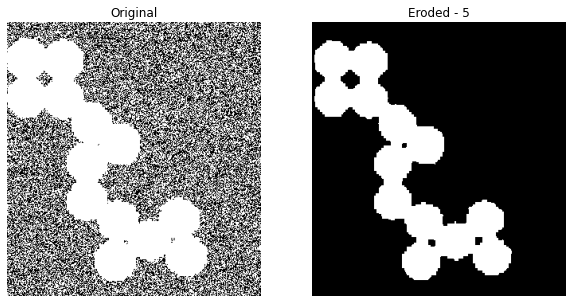

True

In [ ]:
obj= FiltrosMorfologicos()
obj.erode_this(img_noise, erosion_level=5, with_plot=True)

#Dilatacion Sin OpenCV

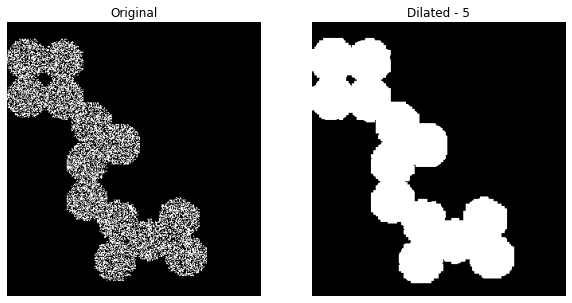

True

In [ ]:
obj.dilate_this(img_noise_dil, dilation_level=5, with_plot=True)

#Apertura Sin openCV

In [ ]:
op = obj.opening(img_noise,dilation_level=5, with_plot=False)

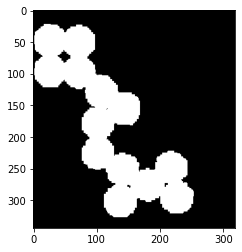

In [ ]:
plt.imshow(op, cmap = 'gray')

#Cierre sin openCV

In [ ]:
cl = obj.closing(img_noise_dil,dilation_level=5, with_plot=False)

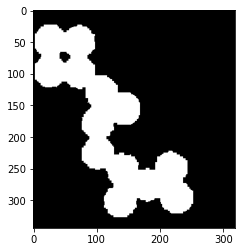

In [ ]:
plt.imshow(cl, cmap='gray')

#Extraccion de bordesç

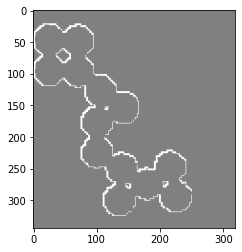

In [ ]:
plt.imshow((img-obj.erode_this(img_noise, erosion_level=5, with_plot=False)), cmap = 'gray')